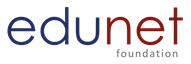

# Edunet Foundation : Self Practice Exercises

### Convolutional Neural Network

#### Importing the libraries

In [3]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2.17.0


### Data Preprocessing

##### Preprocessing the Training set

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(r'C:/Users/PRS/Desktop/Day_3/LAB/content/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 10002 images belonging to 2 classes.


##### Preprocessing the Test set

In [11]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:/Users/PRS/Desktop/Day_3/LAB/content/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


### Building the CNN
#### Initialising the CNN

In [12]:
cnn = tf.keras.models.Sequential()

#### Step 1 - Convolution

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

C:\Users\PRS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Step 2 - Pooling

In [14]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Adding a second convolutional layer

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Step 3 - Flattening

In [16]:
cnn.add(tf.keras.layers.Flatten())

#### Step 4 - Full Connection

In [17]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#### Step 5 - Output Layer

In [18]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Training the CNN

In [19]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### Training the CNN on the Training set and evaluating it on the Test set

In [21]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 5)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 95s 300ms/step - accuracy: 0.6639 - loss: 0.6181 - val_accuracy: 0.7300 - val_loss: 0.5413
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 186ms/step - accuracy: 0.7157 - loss: 0.5619 - val_accuracy: 0.7445 - val_loss: 0.5114
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 186ms/step - accuracy: 0.7469 - loss: 0.5192 - val_accuracy: 0.7675 - val_loss: 0.4797
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 172ms/step - accuracy: 0.7635 - loss: 0.4900 - val_accuracy: 0.7765 - val_loss: 0.4702
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 185ms/step - accuracy: 0.7722 - loss: 0.4813 - val_accuracy: 0.7665 - val_loss: 0.4906


### Making a single prediction

In [40]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'C:/Users/PRS/Desktop/Day_3/LAB/content/test_set/cat/cat.5003.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print(training_set.class_indices) #To find out which number corresponds to which class. 
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
{'cat': 0, 'dog': 1}
cat
